In [1]:
#pip install py_vollib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [3]:
import yfinance as yf


In [4]:
import scipy.stats as ss

import py_vollib.black_scholes.greeks.analytical as derivatives

import math

In [5]:
df_fut = pd.read_csv('FUTIDX_BANKNIFTY_28-May-2021_TO_24-Jun-2021.txt')  #Fill in with the address of where you downloaded the file. You can check in properties of the file
df_fut.head()

,Symbol,Date,Expiry,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Open Int,Change in OI,Underlying Value
0,BANKNIFTY,28-May-2021,24-Jun-2021,35499.00,35670.00,35150.00,35321.80,35394.05,35321.80,151658,1340811.02,1745000,27775,35141.45
1,BANKNIFTY,31-May-2021,24-Jun-2021,35280.00,35650.00,35063.15,35602.90,35578.25,35602.90,141916,1257088.18,1723450,-21550,-
2,BANKNIFTY,01-Jun-2021,24-Jun-2021,35677.95,35797.45,35313.95,35454.10,35470.00,35454.10,145631,1292727.92,1731125,7675,-
3,BANKNIFTY,02-Jun-2021,24-Jun-2021,35380.00,35560.00,35180.00,35524.25,35540.00,35524.25,113559,1003669.30,1700025,-31100,-
4,BANKNIFTY,03-Jun-2021,24-Jun-2021,35662.20,35890.00,35553.00,35781.95,35775.00,35781.95,121729,1086929.72,1690250,-9775,-


In [6]:
df_call_36000 = pd.read_csv('OPTIDX_BANKNIFTY_CE_28-May-2021_TO_24-Jun-2021.txt')
df_call_36000.head()

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
0,BANKNIFTY,28-May-2021,24-Jun-2021,CE,36000,849.95,924.50,665.60,730.80,743.30,730.80,26704,245464.26,5128.26,320700,116225,35141.45
1,BANKNIFTY,31-May-2021,24-Jun-2021,CE,36000,693.90,790.00,598.10,772.95,752.05,772.95,19525,179242.57,3517.57,331150,10450,-
2,BANKNIFTY,01-Jun-2021,24-Jun-2021,CE,36000,782.00,832.00,633.35,660.65,661.00,660.65,31536,289503.11,5679.11,313700,-17450,-
3,BANKNIFTY,02-Jun-2021,24-Jun-2021,CE,36000,575.50,625.95,533.85,612.70,606.85,612.70,19060,174293.32,2753.32,324475,10775,-
4,BANKNIFTY,03-Jun-2021,24-Jun-2021,CE,36000,659.05,753.90,596.50,698.40,696.00,698.40,24549,225062.12,4121.12,328425,3950,-


In [7]:
symbol = '^NSEBANK'
end = '2021-06-25'
start = '2021-05-28'

In [8]:
df = yf.download(symbol,start,end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-28,35345.648438,35436.648438,34977.199219,35141.449219,35141.449219,0
2021-05-31,35097.449219,35584.300781,34930.101562,35526.648438,35526.648438,0
2021-06-01,35639.750000,35713.898438,35241.199219,35337.199219,35337.199219,0
2021-06-02,35271.601562,35415.851562,35070.300781,35373.750000,35373.750000,0
2021-06-03,35536.449219,35723.699219,35413.000000,35649.000000,35649.000000,0


In [9]:
symbol = '^NSEBANK'
end = '2021-05-28'
start = '2020-05-28'

In [48]:
df_year= yf.download(symbol,start,end)
df_year.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-28,18924.449219,19455.550781,18818.949219,19169.800781,19169.800781,561100
2020-05-29,18962.000000,19358.050781,18729.900391,19297.250000,19297.250000,581700
2020-06-01,19728.900391,20225.349609,19632.900391,19959.900391,19959.900391,558100
2020-06-02,20120.599609,20615.750000,19852.550781,20530.199219,20530.199219,448300
2020-06-03,20966.599609,21619.550781,20822.000000,20940.699219,20940.699219,616900


In [49]:
ret = df_year['Close'].pct_change()[1:]

In [50]:
ret.head()


Date
2020-05-29    0.006648
2020-06-01    0.034339
2020-06-02    0.028572
2020-06-03    0.019995
2020-06-04   -0.026277
Name: Close, dtype: float64

In [15]:
daily_vol = ret.std()
daily_vol


0.018580334637206992

In [17]:
annual_vol=math.sqrt(252)*daily_vol
annual_vol

0.2949536683584554

In [54]:
expiry = datetime.strptime('2021-06-24', '%Y-%m-%d')   #Expiry date


In [55]:
time = expiry-df.index    #Time left in days
time

TimedeltaIndex(['392 days', '391 days', '388 days', '387 days', '386 days',
                '385 days', '384 days', '381 days', '380 days', '379 days',
                ...
                 '41 days',  '38 days',  '37 days',  '36 days',  '35 days',
                 '34 days',  '31 days',  '30 days',  '29 days',  '28 days'],
               dtype='timedelta64[ns]', name='Date', length=249, freq=None)

In [77]:
time=time.days


AttributeError: 'Int64Index' object has no attribute 'days'

In [59]:
import datetime as dt
time

Int64Index([392, 391, 388, 387, 386, 385, 384, 381, 380, 379,
            ...
             41,  38,  37,  36,  35,  34,  31,  30,  29,  28],
           dtype='int64', name='Date', length=249)

Initial buying and selling



In [60]:
no_of_lots_fut = 10           #number of future lots we bought at start of the month
buy_avg_future = df_fut['Open'][0]       #buying average of that lot
lot_size = 25     #lot size of bank nifty
delta = 1*no_of_lots_fut*lot_size    #taking delta of future is 1 as if banknifty changes by 1 the future would also change by 1
delta_to_maintain = 0.8*no_of_lots_fut*lot_size#Maintain 0.8 delta per future contract

In [61]:
flag = 'c'   #for call or put option
S = df['Open'][0]    #price of the underlying
K = 36000   #strike price
t = time[0]/365   #time left to expiry in years
sigma = annual_vol   #volatility
r = 0.06  #risk free rate
delta_per_lot_call =derivatives.delta(flag,S,K,t,r,sigma) #Calculate delta per lot
delta_per_lot_call

0.04091615824385745

In [62]:
delta_to_maintain


200.0

In [63]:
delta

250

In [64]:
number_of_lots_call = int((delta-delta_to_maintain)/delta_per_lot_call) #Calculate Number of call lots we have to sell to keep delta of 200


In [65]:
number_of_lots_call


1222

In [66]:
sell_avg_call = df_call_36000['Open'][0]  #selling avg of call 
sell_avg_call

849.95

In [67]:
# Before moving on to managing delta, answer a few questions:

#Q1 : What do you think would happen to the delta of call option as banknifty goes up? (increase/decrease) 
#Ans : Delta will increase

#Q2 : So to manage the delta what would be done to call options already sold? (Buy some call options / Sell more) 
#Hint : Remember selling call options would give negative delta
#Ans : To maintain delta at 200 we need to sell more call option

Managing delta

In [69]:
number_of_lots_call = math.ceil((delta-delta_to_maintain)/delta_per_lot_call)  #number of call lots we have to sell to keep delta of 200
sell_avg_call = df_call_36000['Open'][0]  #selling avg of call 
profit= []

for i in range(len(df)-1):
    delta_per_lot_call = derivatives.delta(flag,df['Open'][i],K,time[i]/365,r,sigma)#Calculate delta per lot at the next closing day
    current_number_of_lots_call = number_of_lots_call#number of lots required to sell
    no_of_lots_added =  math.ceil((delta-delta_to_maintain)/delta_per_lot_call) - current_number_of_lots_call#number of lots added/subtracted for selling
    sell_avg_call = df_call_36000['Open'][i]#new selling avg of call
    number_of_lots_call = current_number_of_lots_call + no_of_lots_added#update number of lots of calls sold
    profit.append((df_fut['Close'][i]-buy_avg_future)*no_of_lots_fut*lot_size + (sell_avg_call-df_call_36000['Close'][i])*lot_size*number_of_lots_call)  #unrealised profit 
    print(df_fut['Close'][i], buy_avg_future, sell_avg_call, df_call_36000['Close'][i])

35321.8 35499.0 849.95 730.8
35602.9 35499.0 693.9 772.95
35454.1 35499.0 782.0 660.65
35524.25 35499.0 575.5 612.7
35781.95 35499.0 659.05 698.4
35508.5 35499.0 677.1 549.15
35622.2 35499.0 563.0 537.05
35265.3 35499.0 501.95 349.15
34929.35 35499.0 330.7 234.7
35266.35 35499.0 218.95 306.15
35169.35 35499.0 352.7 242.95
35065.1 35499.0 192.6 172.55
35330.4 35499.0 176.35 203.7
35101.35 35499.0 177.25 145.05
34682.2 35499.0 86.95 55.9
34596.75 35499.0 57.3 32.05
34911.1 35499.0 28.0 25.65
34775.8 35499.0 64.05 14.7
34611.9 35499.0 19.9 8.1
34819.95 35499.0 4.4 0.25


KeyError: 20

In [70]:
#As you can see that the number of lots of call sold is way too many as the delta of out of money call option approches 0 in the end
#Thus this strategy would practically be possible by changing the strike price of the call option as it goes deep out of money
#But that would require much higher level programming thats why we have given this simple assignment jst theoretically make
#you realise the power of hedging
number_of_lots_call

470

In [71]:
sell_avg_call

4.4

In [72]:
delta_per_lot_call

0.0743111846347983

In [73]:
profit

[3598711.2500000037,
 -2373192.500000002,
 2849601.25,
 -768377.5000000009,
 -563781.250000001,
 2097556.250000001,
 515416.2500000001,
 2027295.000000001,
 1307187.4999999995,
 -1610322.5000000002,
 1698281.2499999995,
 435381.2499999992,
 -593252.4999999995,
 544587.4999999994,
 499858.7499999994,
 350768.75,
 -105732.50000000032,
 573021.2500000006,
 -58639.99999999965,
 -121000.00000000073]

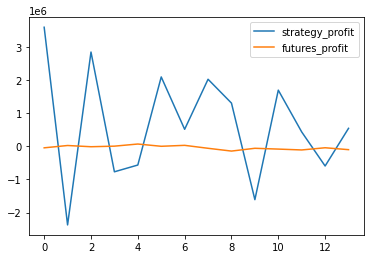

In [74]:
plt.plot(profit[:14], label = 'strategy_profit')
plt.plot((df_fut['Close']-df_fut['Open'][0])[:14]*250, label = 'futures_profit')
plt.legend()

As you can see from the above graph of first first 14 days of the strategy that though the futures did fall very down but
We were able to hedge this with selling of call option and our strategy did give better returns overall


We didnt plot the whole graph as in the end many lots of call options were sold which is practically not possible